In [1]:
!pip install scikit-learn==0.19.1

In [2]:
!pip install seaborn==0.11.2

    100% |████████████████████████████████| 296kB 9.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.0MB/s eta 0:00:01
    100% |████████████████████████████████| 11.5MB 3.0MB/s eta 0:00:01   20% |██████▊                         | 2.4MB 71.5MB/s eta 0:00:01
    100% |████████████████████████████████| 49.4MB 465kB/s eta 0:00:01    69% |██████████████████████▏         | 34.3MB 74.0MB/s eta 0:00:01
    100% |████████████████████████████████| 1.1MB 20.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for pillow ... done
  Stored in directory: /root/.cache/pip/wheels/a7/69/9a/bba9fca6782340f88dbc378893095722a663cbc618e58fe401
Successfully built pillow
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
scikit-image 0.14.2 has requirement dask[array]>=1.0.0, but you'll have dask 0.16.1 which is incompatible.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found exi

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# A Look at the Data



In [4]:
# Load the dataset
listings = pd.read_csv('listings.csv')

In [5]:
pd.set_option("max_columns", None) # show all cols
pd.set_option("expand_frame_repr", True) # print cols side by side as it's supposed to be

In [6]:
# Check the first few rows
print(listings.head())

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

In [7]:
# Check for missing values
pd.set_option('display.max_rows', None)
print(listings.isnull().sum())
pd.reset_option('display.max_rows')


id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [8]:
# Summary statistics
print(listings.describe())

                 id     scrape_id       host_id  host_listings_count  \
count  3.818000e+03  3.818000e+03  3.818000e+03          3816.000000   
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.157757   
std    2.962660e+06  0.000000e+00  1.458382e+07            28.628149   
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000   
25%    3.258256e+06  2.016010e+13  3.275204e+06             1.000000   
50%    6.118244e+06  2.016010e+13  1.055814e+07             1.000000   
75%    8.035127e+06  2.016010e+13  2.590309e+07             3.000000   
max    1.034016e+07  2.016010e+13  5.320861e+07           502.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                3816.000000  3818.000000  3818.000000   3818.000000   
mean                    7.157757    47.628961  -122.333103      3.349398   
std                    28.628149     0.043052     0.031745      1.977599   
min                     1.000000    47.505088  

In [9]:
# Check datatypes
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

# Preprocess and clean the data

In [10]:
# Remove dollar signs and commas from price and convert to float
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)


In [11]:
# Drop columns with too many missing values
listings = listings.dropna(thresh=len(listings) * 0.6, axis=1)

In [12]:
# Fill missing values in other columns with appropriate values
# Listing the numerical and categorical columns
num_cols = listings.select_dtypes(exclude=object).columns.tolist()
cat_cols = listings.select_dtypes(include=object).columns.tolist()

# Numeric columns: Use median 
listings[num_cols] = listings[num_cols].fillna(listings[num_cols].median())

# Categorical columns: Use mode 
listings[cat_cols] = listings[cat_cols].fillna(listings[cat_cols].mode().iloc[0])  # Use mode to fill NA


# 1. What is the average cost of renting a hotel room through Airbnb in Seattle per night?

The average cost of renting a hotel room through Airbnb in Seattle per night is $127.98


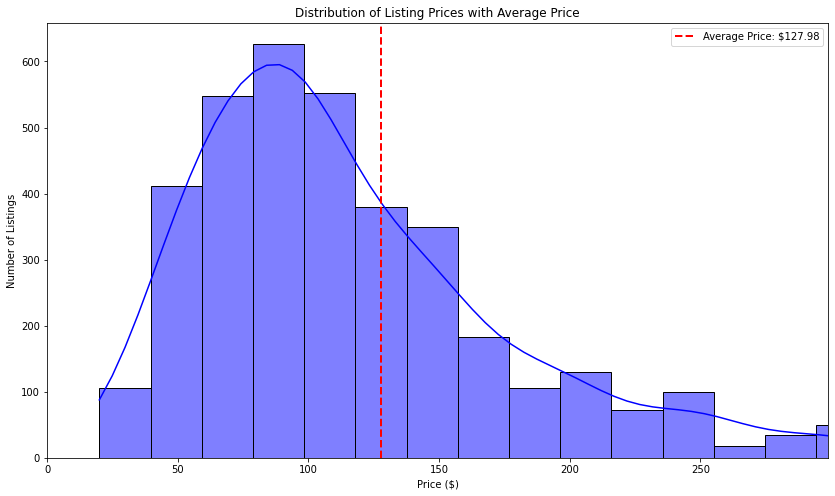

In [21]:
# Calculate the average price
average_price = listings['price'].mean()
print(f"The average cost of renting a hotel room through Airbnb in Seattle per night is ${average_price:.2f}")

# Plot the distribution of listing prices with distplot
plt.figure(figsize=(14, 8))
sns.histplot(listings['price'], bins=50, kde=True, color="blue")

# Add a vertical line for the average price
plt.axvline(average_price, color='red', linestyle='--', linewidth=2, label=f'Average Price: ${average_price:.2f}')

# Title and labels
plt.title('Distribution of Listing Prices with Average Price')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.xlim(0, listings['price'].quantile(0.95))

plt.legend()
plt.show()


# 2. What factors influence the price when booking a room via Airbnb in Seattle ('bedrooms', 'bathrooms', 'beds', 'review scores rating', 'property type', 'room type', 'neighbourhood group cleansed')?

Use a simple linear regression model to identify the factors

In [22]:
# Selecting relevant columns
features = listings[['bedrooms', 'bathrooms', 'beds', 'review_scores_rating', 'property_type', 'room_type', 'neighbourhood_group_cleansed']]
target = listings['price']

# Apply one-hot encoding to categorical variables
features = pd.get_dummies(features, drop_first=True)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=8)

# Initialize a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=8)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


MAE: 37.91505644167256


                                             Feature  Importance
0                                           bedrooms    0.481136
1                                          bathrooms    0.131085
3                               review_scores_rating    0.100703
2                                               beds    0.056109
19                            room_type_Private room    0.033063
26             neighbourhood_group_cleansed_Downtown    0.021505
22         neighbourhood_group_cleansed_Capitol Hill    0.021088
32           neighbourhood_group_cleansed_Queen Anne    0.020476
20                             room_type_Shared room    0.018240
12                               property_type_House    0.016460
5                                 property_type_Boat    0.011780
31  neighbourhood_group_cleansed_Other neighborhoods    0.011751
10                         property_type_Condominium    0.011573
23              neighbourhood_group_cleansed_Cascade    0.009428
24         neighbourhood_

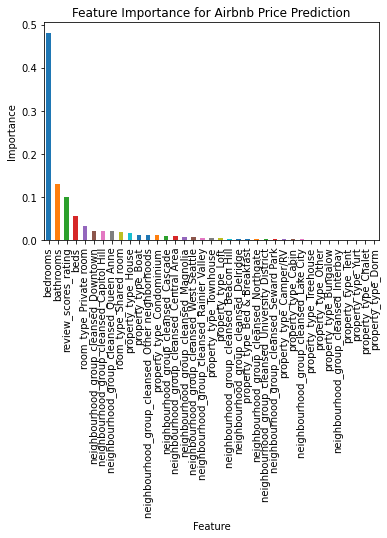

In [24]:
# Get the feature importance
importances = model.feature_importances_
feature_names = features.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the most important factors
print(importance_df)

# Optionally, plot the feature importance
import matplotlib.pyplot as plt
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance for Airbnb Price Prediction')
plt.ylabel('Importance')
plt.show()


# 3. How does the price of renting a hotel room through Airbnb in downtown Seattle compare to suburban areas?

In [26]:
# Check the name of neighbourhoods
pd.set_option('display.max_rows', None)
dtn = set(listings['neighbourhood_group_cleansed'])
print(dtn)
pd.reset_option('display.max_rows')


{'Magnolia', 'Capitol Hill', 'Lake City', 'Cascade', 'University District', 'Central Area', 'Ballard', 'Queen Anne', 'Other neighborhoods', 'Interbay', 'West Seattle', 'Rainier Valley', 'Delridge', 'Beacon Hill', 'Northgate', 'Downtown', 'Seward Park'}


In [29]:
downtown_neighbourhoods = ['Downtown']
listings['is_downtown'] = listings['neighbourhood_group_cleansed'].apply(lambda x: 1 if x in downtown_neighbourhoods else 0)

# Calculate average prices
average_price_downtown = listings[listings['is_downtown'] == 1]['price'].mean()
average_price_suburban = listings[listings['is_downtown'] == 0]['price'].mean()

print(f"The average price of renting a hotel room through Airbnb in downtown Seattle is ${average_price_downtown:.2f}")
print(f"The average price of renting a hotel room through Airbnb in suburban areas is ${average_price_suburban:.2f}")

The average price of renting a hotel room through Airbnb in downtown Seattle is $154.41
The average price of renting a hotel room through Airbnb in suburban areas is $123.72


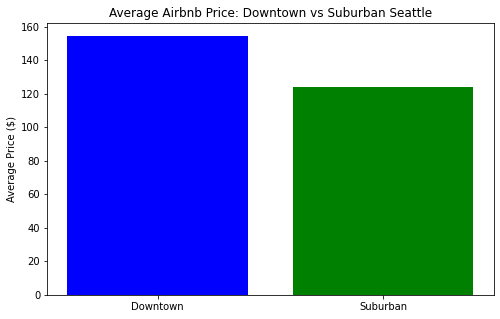

In [30]:
# Prepare data for visualization
labels = ['Downtown', 'Suburban']
average_prices = [average_price_downtown, average_price_suburban]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, average_prices, color=['blue', 'green'])
plt.title('Average Airbnb Price: Downtown vs Suburban Seattle')
plt.ylabel('Average Price ($)')
plt.show()